In [611]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [612]:
df_walmart = pd.read_csv("walmart.csv")

In [613]:
df_walmart['CPI'].unique()

array([211.0963582, 211.2421698, 211.2891429, ..., 214.6772833,
       214.7212488, 214.7415392])

In [614]:
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [615]:
df_walmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [616]:
df_walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [617]:
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'])
df_walmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [618]:
df_walmart['Year']  = df_walmart['Date'].dt.year
df_walmart['Month'] = df_walmart['Date'].dt.month
df_walmart['Day'] = df_walmart['Date'].dt.weekday
df_walmart['Quarter'] = df_walmart['Date'].dt.quarter
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Quarter       6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [619]:
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0,2


In [620]:
df_walmart_copy= df_walmart.copy()
df_walmart_copy

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,3,2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,0,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4,4


In [621]:
# Let's convert months and days from numerics to categories
Months_map = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
              10:"October",11:"November",12:"December"}
df_walmart['Month']= df_walmart['Month'].map(Months_map)

days_map = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df_walmart['Day'] = df_walmart['Day'].map(days_map)

df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,Wednesday,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday,2


In [622]:
df_walmart.head(25)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,Wednesday,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday,2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,December,Thursday,4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,March,Thursday,1
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,March,Thursday,1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,February,Wednesday,1
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,2010,September,Friday,3


In [623]:
def classify_season(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'Fall': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Fall']:
        return 'Fall'
    else:
        return 'Winter'

df_walmart['Season'] = df_walmart['Date'].map(classify_season)
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,May,Saturday,2,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,December,Wednesday,4,Fall
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,February,Thursday,1,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,February,Thursday,1,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,May,Sunday,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,September,Thursday,3,Fall
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,May,Wednesday,2,Spring
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,December,Sunday,4,Fall
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,October,Thursday,4,Fall


In [624]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   object        
 10  Day           6435 non-null   object        
 11  Quarter       6435 non-null   int64         
 12  Season        6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 653.7+ KB


In [625]:
print(df_walmart['Weekly_Sales'].describe())

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


# Exploratory Analysis and Data Preprocessing

In [626]:
df_season = df_walmart.groupby('Season')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
df_season.head(10)


,Season,Weekly_Sales
0,Spring,1.816557e+09
1,Summer,1.764829e+09
2,Fall,1.586767e+09
3,Winter,1.569066e+09


Text(0.5, 1.0, 'Annual Sales')

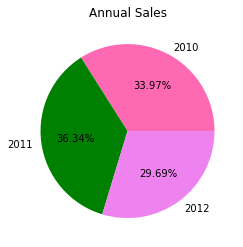

In [627]:
plt.pie(df_walmart.groupby('Year')['Weekly_Sales'].sum(),labels=df_walmart['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

Year 2010 has the highest sale followed by 2011 and 2012.

Text(0.5, 1.0, 'Annual Sales by Different Seasons')

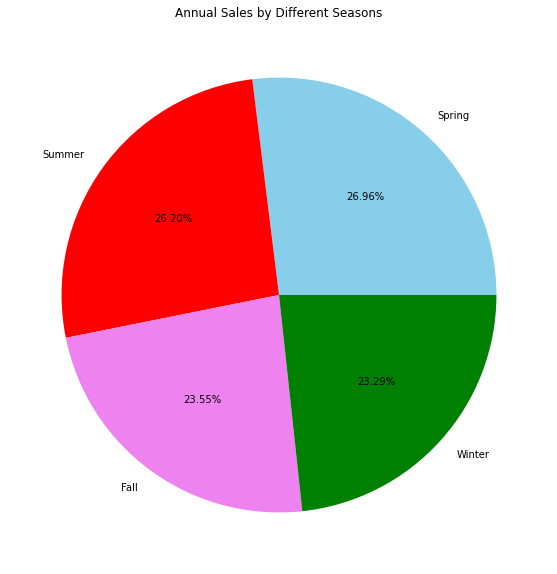

In [628]:
plt.figure(figsize=(10,10))
plt.pie(df_season['Weekly_Sales'], labels=df_season['Season'],normalize=True,autopct='%1.2f%%',colors=['skyblue','red','violet', 'green'])
plt.title('Annual Sales by Different Seasons')

From the plot above, we can see that during Spring, there is more sales in Walmart.

In [629]:
df_day = df_walmart.groupby('Day')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
df_day.head(10)

,Day,Weekly_Sales
0,Thursday,4.486257e+09
1,Sunday,5.390133e+08
2,Wednesday,4.766244e+08
3,Monday,4.335075e+08
4,Saturday,4.266091e+08
5,Friday,2.824947e+08
6,Tuesday,9.271282e+07


Text(0.5, 1.0, 'Annual Sales by Day')

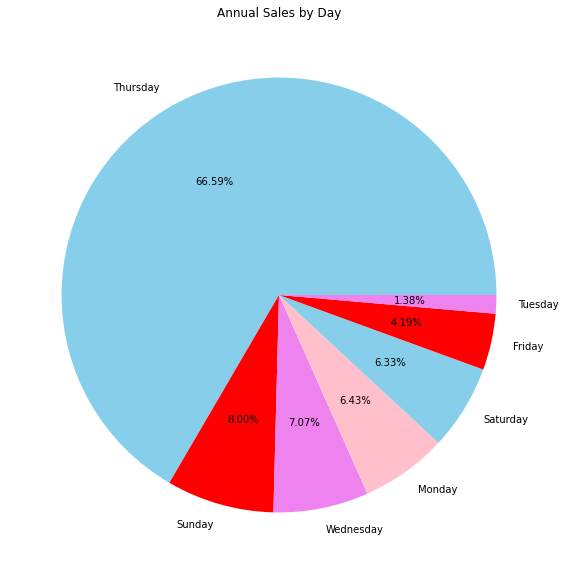

In [630]:
plt.figure(figsize=(10,10))
plt.pie(df_day['Weekly_Sales'],labels= df_day['Day'],normalize=True,autopct='%1.2f%%',colors=['skyblue','red','violet', 'pink'])
plt.title('Annual Sales by Day')





From the piechart above, we can see that most sales have happened on Thursday. 

In [631]:
df_month = df_walmart.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
df_month.head(10)

,Month,Weekly_Sales
0,April,6.453239e+08
1,May,6.056966e+08
2,October,6.029189e+08
3,December,5.990761e+08
4,July,5.933139e+08
5,September,5.905323e+08
6,June,5.750180e+08
7,August,5.642317e+08
8,March,5.534864e+08
9,February,5.220257e+08


Text(0.5, 1.0, 'Annual Sales by Month')

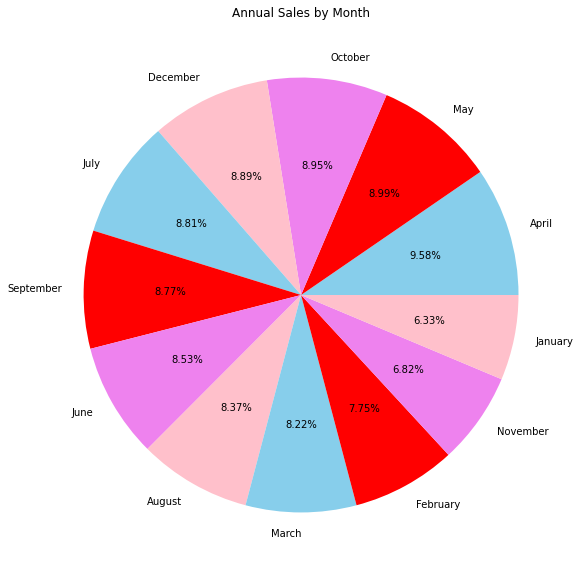

In [632]:
plt.figure(figsize=(10,10))
plt.pie(df_month['Weekly_Sales'], labels= df_month['Month'],normalize=True,autopct='%1.2f%%',colors=['skyblue','red','violet', 'pink'])
plt.title('Annual Sales by Month')

From the plot above , we can see that most sales have happened in April as per the data .

In [633]:
df_walmart.groupby('Holiday_Flag')['Weekly_Sales'].sum().sort_values(ascending=False)

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x7f8335995430>,
 [Text(-1.0696059603508306, 0.2567938659352628, 'Non-Special Holiday Week'),
  Text(1.0696059783829106, -0.25679379082745957, 'Special Holiday Week')],
 [Text(-0.5834214329186348, 0.14006938141923425, '92.50%'),
  Text(0.5834214427543147, -0.14006934045134156, '7.50%')])

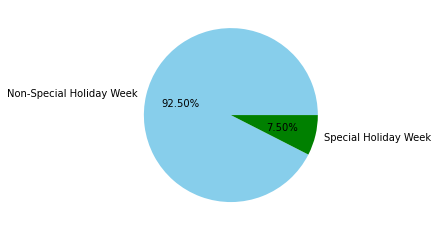

In [634]:

plt.pie(df_walmart.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()['Weekly_Sales'],labels= ['Non-Special Holiday Week','Special Holiday Week'],normalize=True,
        autopct='%1.2f%%',colors=['skyblue','green'])

So, from the plot above, it is clear that more sales have happened in non-special holiday week. 

In [635]:
df_walmart.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


Store 20 has done the highest weekly sales. 

In [636]:
df_walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
Year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03
Quarter,6435.0,2.496503e+00,1.083165,1.000,2.000,2.000000,3.000000e+00,4.000000e+00


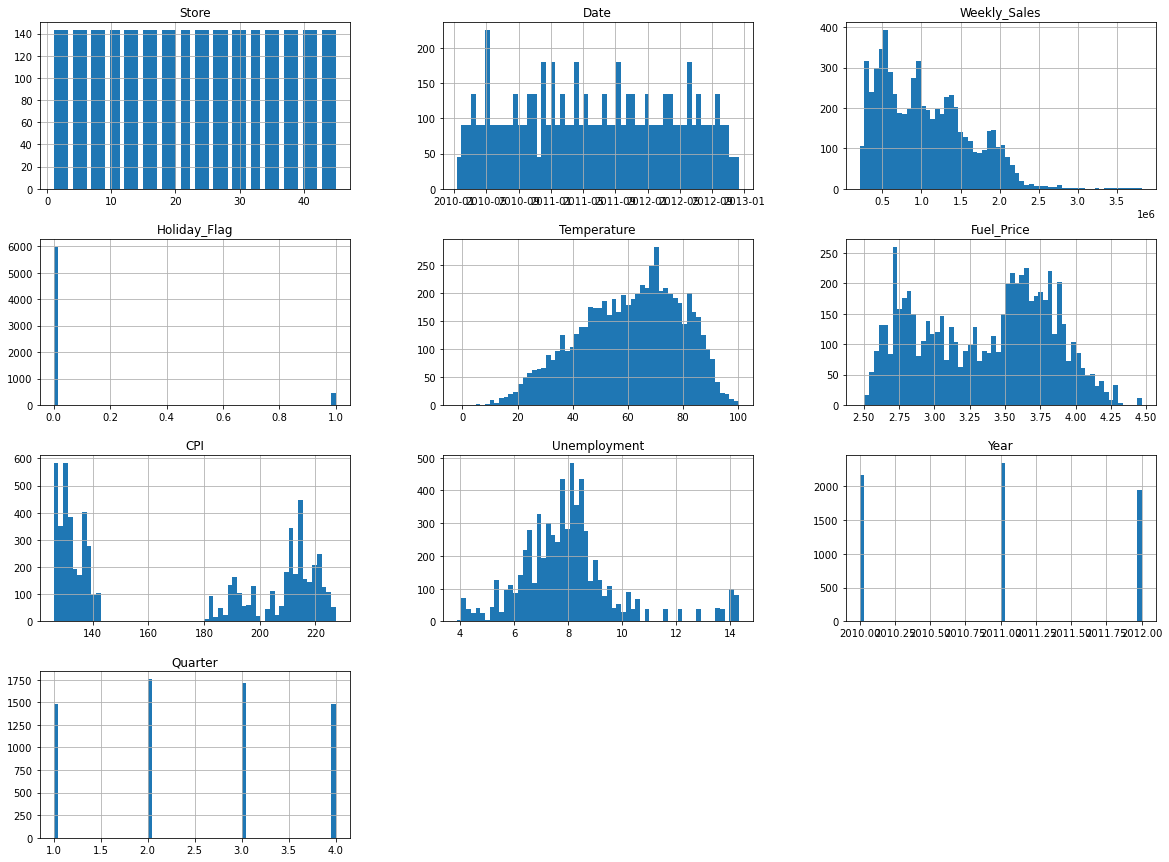

In [637]:
# Lets draw Histogram for all columns
df_walmart.hist(bins=60, figsize=(20,15))
plt.show()

<Figure size 576x288 with 0 Axes>

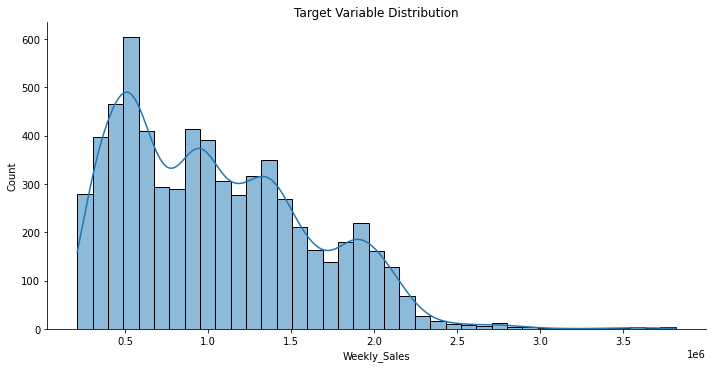

In [638]:
plt.figure(figsize=[8,4])
sns.displot(data= df_walmart['Weekly_Sales'], kde=True, aspect=2)
plt.title('Target Variable Distribution')
plt.show()

<Figure size 576x288 with 0 Axes>

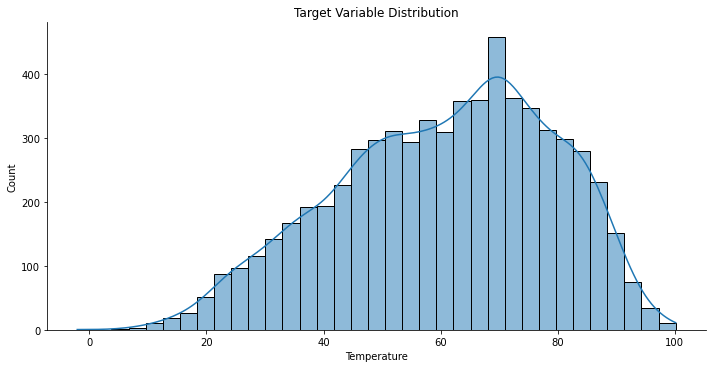

In [639]:
plt.figure(figsize=[8,4])
sns.displot(data= df_walmart['Temperature'], kde=True, aspect=2)
plt.title('Target Variable Distribution')
plt.show()

<AxesSubplot:xlabel='Temperature'>

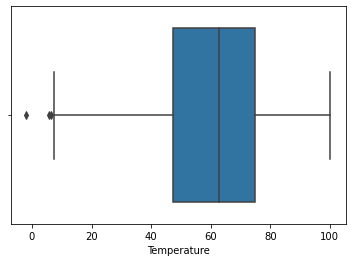

In [640]:
sns.boxplot(x=df_walmart['Temperature'])

<Figure size 576x288 with 0 Axes>

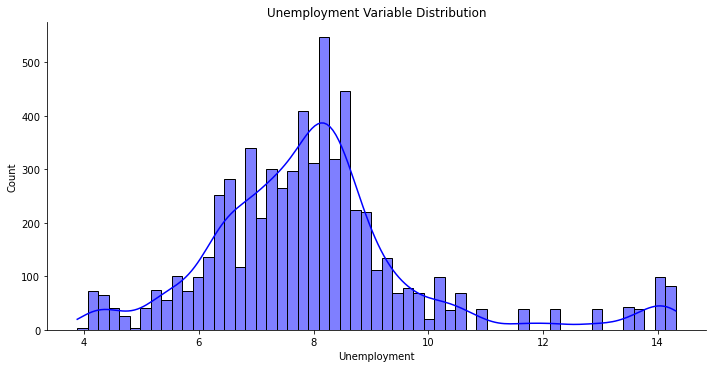

In [641]:
plt.figure(figsize=[8,4])
sns.displot(df_walmart['Unemployment'], color='b', kde=True, aspect=2)
plt.title('Unemployment Variable Distribution')
plt.show()

<AxesSubplot:xlabel='Unemployment'>

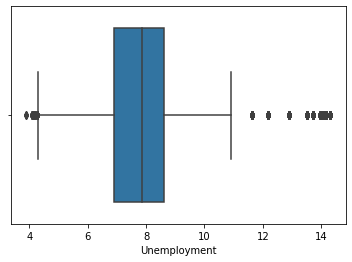

In [642]:
sns.boxplot(x=df_walmart['Unemployment'])

<Figure size 576x288 with 0 Axes>

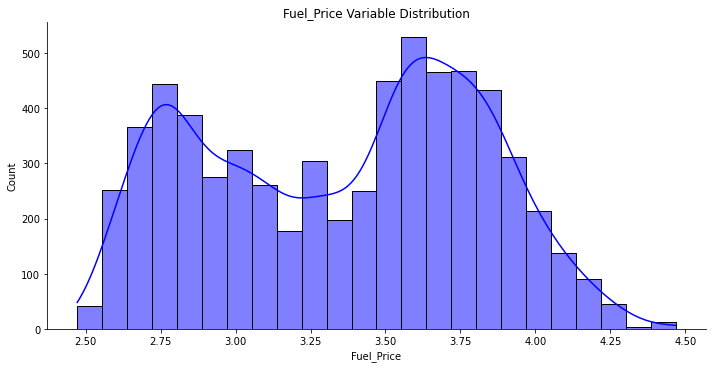

In [643]:
plt.figure(figsize=[8,4])
sns.displot(df_walmart['Fuel_Price'], color='b', kde=True, aspect=2)
plt.title('Fuel_Price Variable Distribution')
plt.show()

<AxesSubplot:xlabel='Fuel_Price'>

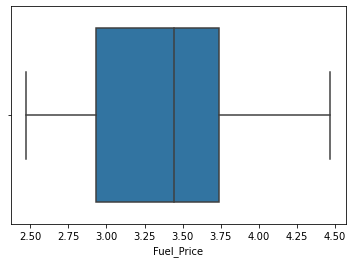

In [644]:
sns.boxplot(x=df_walmart['Fuel_Price'])

<Figure size 576x288 with 0 Axes>

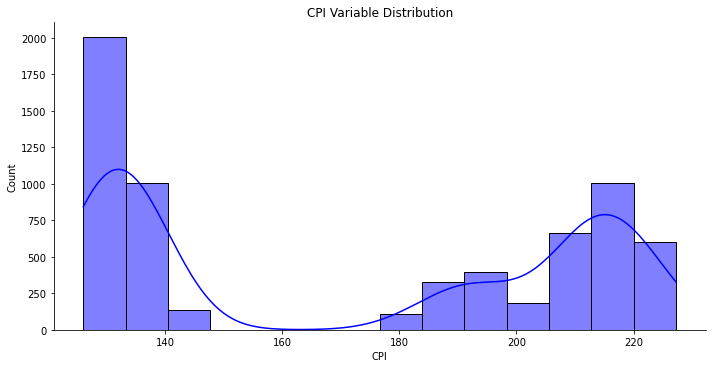

In [645]:
plt.figure(figsize=[8,4])
sns.displot(df_walmart['CPI'], color='b', kde=True, aspect=2)
plt.title('CPI Variable Distribution')
plt.show()

<AxesSubplot:xlabel='CPI'>

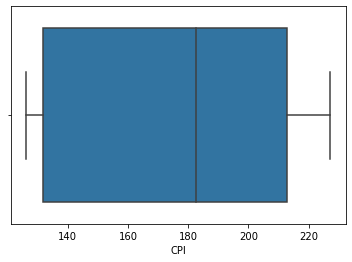

In [646]:
sns.boxplot(x=df_walmart['CPI'])

Machine learning algorithms like Linear Regression assume the numerical variables have a Gaussian probability distribution. Our data have a Gaussian-like distribution (e.g. nearly Gaussian but with outliers or a skew). As you can see, Temperature and Unemployment feature of the data has some outliers. Power transforms are a method for transforming numerical input or output variables into probability distributions that are Gaussian or more Gaussian-like. So, lets transform the features into more Gaussian-like.

In [647]:
features =['CPI','Fuel_Price','Temperature', 'Unemployment']
df_features = df_walmart[features]
Transform = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(Transform.fit_transform(df_features),columns=features)
pd.DataFrame({'cols':features, 'box-cox lamda': Transform.lambdas_})

for f in features:
    df_walmart[f] = df_transformed[f]
    
    
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Season
0,1,2010-05-02,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2010,May,Saturday,2,Spring
1,1,2010-12-02,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,2010,December,Wednesday,4,Fall
2,1,2010-02-19,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,2010,February,Thursday,1,Winter
3,1,2010-02-26,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,2010,February,Thursday,1,Winter
4,1,2010-05-03,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,2010,May,Sunday,2,Spring


Let's remove the outliers from unemployment and Temperature. You can see that most of the outliers have been removed from the feature Unemployment and all the outliers have been removed from feature Temperature. 

In [648]:
'''Q1 = df_walmart['Unemployment'].quantile(0.25)
Q3 = df_walmart['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df_walmart = df_walmart[df_walmart['Unemployment'] >= Q1-1.5*(IQR)]
df_walmart = df_walmart[df_walmart['Unemployment'] <= Q3+1.5*(IQR)]
sns.boxplot(x=df_walmart['Unemployment'])'''

"Q1 = df_walmart['Unemployment'].quantile(0.25)\nQ3 = df_walmart['Unemployment'].quantile(0.75)\nIQR = Q3-Q1\n\ndf_walmart = df_walmart[df_walmart['Unemployment'] >= Q1-1.5*(IQR)]\ndf_walmart = df_walmart[df_walmart['Unemployment'] <= Q3+1.5*(IQR)]\nsns.boxplot(x=df_walmart['Unemployment'])"

In [649]:
'''Q1 = df_walmart['Temperature'].quantile(0.25)
Q3 = df_walmart['Temperature'].quantile(0.75)
IQR = Q3-Q1

df_walmart = df_walmart[df_walmart['Temperature'] >= Q1-1.5*(IQR)]
df_walmart = df_walmart[df_walmart['Temperature'] <= Q3+1.5*(IQR)]
sns.boxplot(x=df_walmart['Temperature'])'''

"Q1 = df_walmart['Temperature'].quantile(0.25)\nQ3 = df_walmart['Temperature'].quantile(0.75)\nIQR = Q3-Q1\n\ndf_walmart = df_walmart[df_walmart['Temperature'] >= Q1-1.5*(IQR)]\ndf_walmart = df_walmart[df_walmart['Temperature'] <= Q3+1.5*(IQR)]\nsns.boxplot(x=df_walmart['Temperature'])"

# Feature Selection (Correlation Analysis )

In [650]:
d_corr= df_walmart.corr()
d_corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.023338,0.060252,-0.199320,0.222060,3.474318e-12,-2.438190e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.067962,0.008950,-0.069546,-0.105060,-1.837754e-02,5.680360e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.150480,-0.079051,-0.002083,0.012349,-5.678257e-02,3.300069e-01
Temperature,-2.333765e-02,-0.067962,-1.504803e-01,1.000000,0.142176,0.161172,0.092682,6.371456e-02,6.882223e-02
Fuel_Price,6.025187e-02,0.008950,-7.905104e-02,0.142176,1.000000,-0.171436,-0.064164,7.769391e-01,-5.111742e-02
CPI,-1.993199e-01,-0.069546,-2.083149e-03,0.161172,-0.171436,1.000000,-0.240324,7.179682e-02,8.548223e-04
Unemployment,2.220595e-01,-0.105060,1.234858e-02,0.092682,-0.064164,-0.240324,1.000000,-2.673016e-01,-5.377518e-03
Year,3.474318e-12,-0.018378,-5.678257e-02,0.063715,0.776939,0.071797,-0.267302,1.000000e+00,-1.338171e-01
Quarter,-2.438190e-15,0.056804,3.300069e-01,0.068822,-0.051117,0.000855,-0.005378,-1.338171e-01,1.000000e+00


<AxesSubplot:>

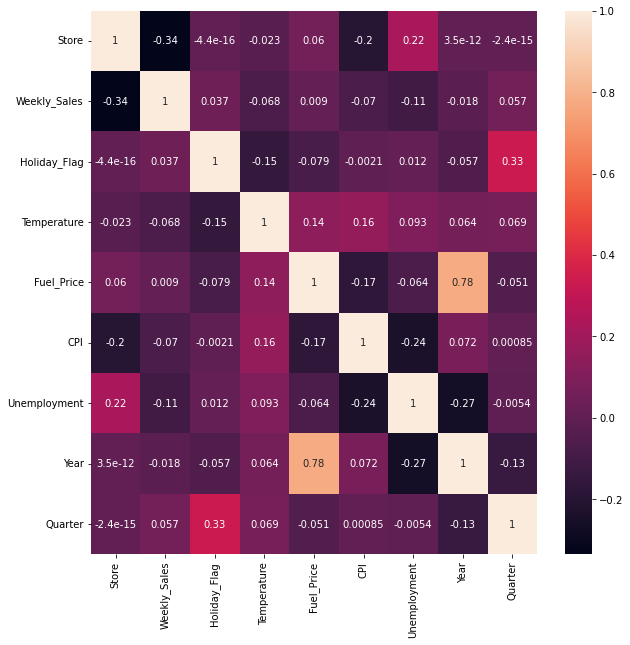

In [651]:
# building correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(d_corr, annot=True)

In [652]:
# Finding the the predictor with the highest relatioship with sales. Chceking correlation with data that has numeric values of 
#day and month
cor = pd.DataFrame(df_walmart_copy.corr()['Weekly_Sales'].drop('Weekly_Sales'))
cor.sort_values(['Weekly_Sales'], ascending = False)

,Weekly_Sales
Month,0.067535
Quarter,0.056804
Holiday_Flag,0.036891
Fuel_Price,0.009464
Year,-0.018378
Day,-0.021041
Temperature,-0.063810
CPI,-0.072634
Unemployment,-0.106176
Store,-0.335332


In [653]:
# Finding the the predictor with the highest relatioship with sales. Checking correlation with data that has categorical values of 
#day and month
cor = pd.DataFrame(df_walmart.corr()['Weekly_Sales'].drop('Weekly_Sales'))
cor.sort_values(['Weekly_Sales'], ascending = False)

,Weekly_Sales
Quarter,0.056804
Holiday_Flag,0.036891
Fuel_Price,0.008950
Year,-0.018378
Temperature,-0.067962
CPI,-0.069546
Unemployment,-0.105060
Store,-0.335332


We can see that the Quarter of the month, the month, holiday has postive correlation with the weekly sales. But Store has the highest correlation with Weekly_Sales but negative. Thus, as the number of stores increases, sales decreases as shown by the regression line below.

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

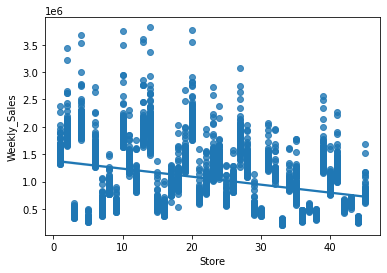

In [654]:
# Regression Analysis between sales and fuel prices
sns.regplot(x='Store', y='Weekly_Sales', data=df_walmart)

### Target guided encoding of day ,month, year column - ranked as per the sales as thursday has the highest sales we have ranked it the highest 6. Months and year has also been ranked accordingly.  

In [655]:

T_G_E= {'Sunday':5,'Monday':3, 'Tuesday':0, 'Wednesday':4, 'Thursday':6,  'Friday':1,'Saturday':2}
df_walmart['Day'] = df_walmart['Day'].map(T_G_E)
df_walmart.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Season
0,1,2010-05-02,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2010,May,2,2,Spring
1,1,2010-12-02,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,2010,December,4,4,Fall
2,1,2010-02-19,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,2010,February,6,1,Winter
3,1,2010-02-26,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,2010,February,6,1,Winter
4,1,2010-05-03,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,2010,May,5,2,Spring


In [656]:
df_walmart_final= df_walmart.copy()

In [657]:
Back_map = {'January':1,'February':3,'March':4,'April':12,'May':11,'June':6,'July':8,'August':5,'September':7,'October':10,'November':2,'December':9}
df_walmart['Month'] = df_walmart['Month'].map(Back_map)
df_walmart.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Season
0,1,2010-05-02,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2010,11,2,2,Spring
1,1,2010-12-02,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,2010,9,4,4,Fall
2,1,2010-02-19,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,2010,3,6,1,Winter
3,1,2010-02-26,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,2010,3,6,1,Winter
4,1,2010-05-03,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,2010,11,5,2,Spring


In [658]:
yr_map = {2010:1, 2011:2, 2012:0}
df_walmart['Year'] = df_walmart['Year'].map(yr_map)
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Quarter,Season
0,1,2010-05-02,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,1,11,2,2,Spring
1,1,2010-12-02,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,1,9,4,4,Fall
2,1,2010-02-19,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,1,3,6,1,Winter
3,1,2010-02-26,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,1,3,6,1,Winter
4,1,2010-05-03,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,1,11,5,2,Spring


In [659]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Quarter       6435 non-null   int64         
 12  Season        6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 653.7+ KB


In [660]:
df_walmart['Month'].unique()

array([11,  9,  3,  4,  7, 12,  8,  2,  6,  5, 10,  1])

In [661]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Quarter       6435 non-null   int64         
 12  Season        6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 653.7+ KB


In [662]:
df_walmart_2= df_walmart.copy()

In [663]:
# Categorical to Dummy Variables
df_walmart_p=  pd.get_dummies(df_walmart_2, columns=[ "Store"],
                         prefix=[ "Store"],
                         drop_first=True)
df_walmart_p.head(2)

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-05-02,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,1,11,2,...,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,1,9,4,...,0,0,0,0,0,0,0,0,0,0


### Model Training and Evaluation

In [664]:
# Separating target variable and predictors
from sklearn import preprocessing
y_2 = df_walmart_p ['Weekly_Sales']
x_2 = df_walmart_p.drop(['Weekly_Sales',  'Date', 'Season', 'Year', 'Quarter'], axis =1)
X = preprocessing.StandardScaler().fit(x_2).transform(x_2)
# splitting data into training and test data at 80% and 20% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_2, train_size = 0.7, random_state = 100)

model = lm.LinearRegression()
model.fit(X_train, Y_train)
y_pred = abs(model.predict(X_test))
print('Y_predicted', y_pred)
print("mean square error: ", mean_squared_error(Y_test, y_pred))

print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
print(f'R2 Score/Accuracy= : {r2_score(Y_test,y_pred) *100}')


import pickle
pickle.dump(model, open('model.pkl', 'wb'))


Y_predicted [1396469.43058435  873151.3809604   556726.90702349 ...  576148.23386343
 1093834.7467046  1439166.11277126]
mean square error:  25458726992.366318
MSE: 25458726992.366318
MAE: 90261.00449930136
R2 Score/Accuracy= : 91.94071453531782


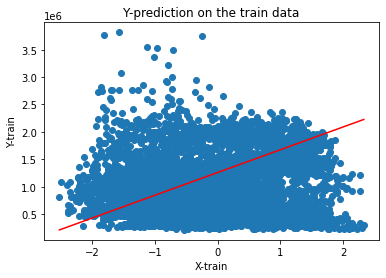

In [665]:
plt.scatter(X_train[:,1], Y_train)
plt.plot([min(X_train[:,1]), max(X_train[:,1])], [min(y_pred), max(y_pred)], color='red')  
    #plt.plot(x_test[:,0],Y_pred , 'r')
plt.xlabel("X-train")
plt.ylabel("Y-train")
plt.title("Y-prediction on the train data")
plt.show()

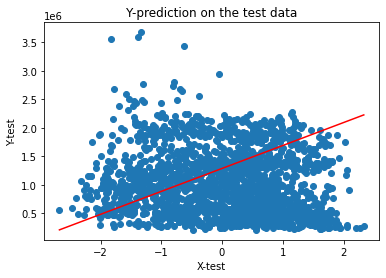

In [666]:
plt.scatter(X_test[:,1], Y_test)
plt.plot([min(X_test[:,1]), max(X_test[:,1])], [min(y_pred), max(y_pred)], color='red')  
    #plt.plot(x_test[:,0],Y_pred , 'r')
plt.xlabel("X-test")
plt.ylabel("Y-test")
plt.title("Y-prediction on the test data")
plt.show()